In [1]:
import importlib
try:
    importlib.reload(utils)
    importlib.reload(coords)
    importlib.reload(bot_base)
except NameError:
    # first execution, most likely
    pass 
import utils
import coords
import bot_base
from utils import *
from coords import *
from bot_base import *
import numpy as np
import cv2

In [2]:
stats = {
    'energy': {
        'base_power': 6.9,
        'equip_power_modifier': 1.37,
        'bars': 11,
        'equip_bars_modifier': 1,
        'cap': 450000,
        'equip_cap_modifier': 1,
        'base_speed': 32.5,
        'equip_speed_modifier': 1.54
    },
    'magic': {
        'base_power': 1,
        'equip_power_modifier': 1.00,
        'bars': 1,
        'equip_bars_modifier': 1,
        'cap': 10000,
        'equip_cap_modifier': 1,
        'base_speed': 3.3,
        'equip_speed_modifier': 1.00
    }
}

In [11]:
find_bbox_coords(["sellout_shop"])

('sellout_shop', (337, 719, 449, 777)),


In [3]:
bbox_i6 = (786, 542, 835, 589)
inventory =  (485, 539, 1102, 807)

In [35]:
1102-485, 807-539

(617, 268)

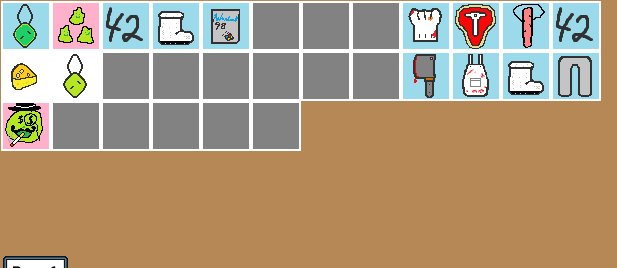

In [4]:
img = screenshot(inventory)
tmpl = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
tmpl

img

In [14]:
sellout_shop =( 337, 719, 449, 777)
tmpl=screenshot(sellout_shop)

In [7]:
np.array(img)[1,2]

array([255, 255, 255], dtype=uint8)

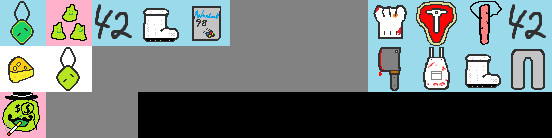

In [5]:
# extract the inventory spaces
# this image is off-aligned by exactly 1 pixel in x and y from the top left
# each inventory space is padded on either side by 2 pixels (total of 4 between each)
# and is 46 * 46 pixels
side = 46
pad = 2
columns = 12
total = 27
aimg = PIL.Image.new("RGB", (columns*46, 3 * 46))
tiles = []
for i in range(total):
    col = (i % columns)
    row = (i // columns)
    
    # skip the offset pixel + the first two pad pixels 
    # on the top and left of the topleft cell
    x = col * side + (pad * col * 2 + 3)
    y = row * side + (pad * row * 2 + 3)
    #print(row, col, x, y)
    tile = img.crop((x, y, x+side, y+side))
    aimg.paste(tile, (46*col,46*row))
    tiles.append(tile)
aimg

In [144]:
# def idx(r, c):
#     return (12 * (r)) + (c)
# def tidx(r,c):
#     return tiles[idx(r,c)]
# def saveas(name, r, c):
#     tiles[idx(r,c)].save(name+".bmp")

# saveas("ascended_forest_pendant", 0, 0)
# saveas("magitech_chestplate", 0, 1)
# saveas("magitech_amulet", 0, 2)
# saveas("looty_mclootface", 0, 3)
# saveas("forest_pendant", 0, 4)
# saveas("toughness2", 0, 5)
# saveas("special2", 0, 6)
# saveas("power2", 0, 7)
# saveas("chef_apron", 0, 9)
# saveas("suspicious_sausage", 0, 10)
# saveas("busted_copy_of_wandoos98", 0, 11)
# saveas("tutorial_cube", 1, 0)
# saveas("magitech_leggings", 1, 1)
# saveas("mole_hammer", 1, 2)
# saveas("combat_cheese", 1, 3)
# saveas("magitech_boots", 1, 4)
# saveas("empty_inventory", 1, 8)
# saveas("nonslip_shoes", 1, 10)
# saveas("raw_slab_of_meat", 1, 11)
# saveas("magitech_ring", 2, 0)
# saveas("no_inventory", 2, 2)

In [9]:
tmpl = cv2.cvtColor(cv2.imread("chedder.png"), cv2.COLOR_BGR2RGB)
#PIL.Image.fromarray(tmpl, "GRB")

In [16]:
%matplotlib
from matplotlib import pyplot as plt
img = tmpl
plt.gcf().clear()
color = ('b','g','r')
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1, 2, 2)
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[255],[0,255])
    ax.plot(histr,color = col)
    plt.xlim([0,256])
    
img = cv2.cvtColor(cv2.imread("images/forest_pendant.bmp"), cv2.COLOR_BGR2RGB)
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[255],[0,255])
    ax2.plot(histr,color = col)
    plt.xlim([0,256]) 
    
    
#plt.show()

Using matplotlib backend: TkAgg


TypeError: images is not a numpy array, neither a scalar

In [32]:
screenshot(sellout_shop).save("test.png")

(336, 719)
(337, 719)
(338, 719)
0.10172724723815918


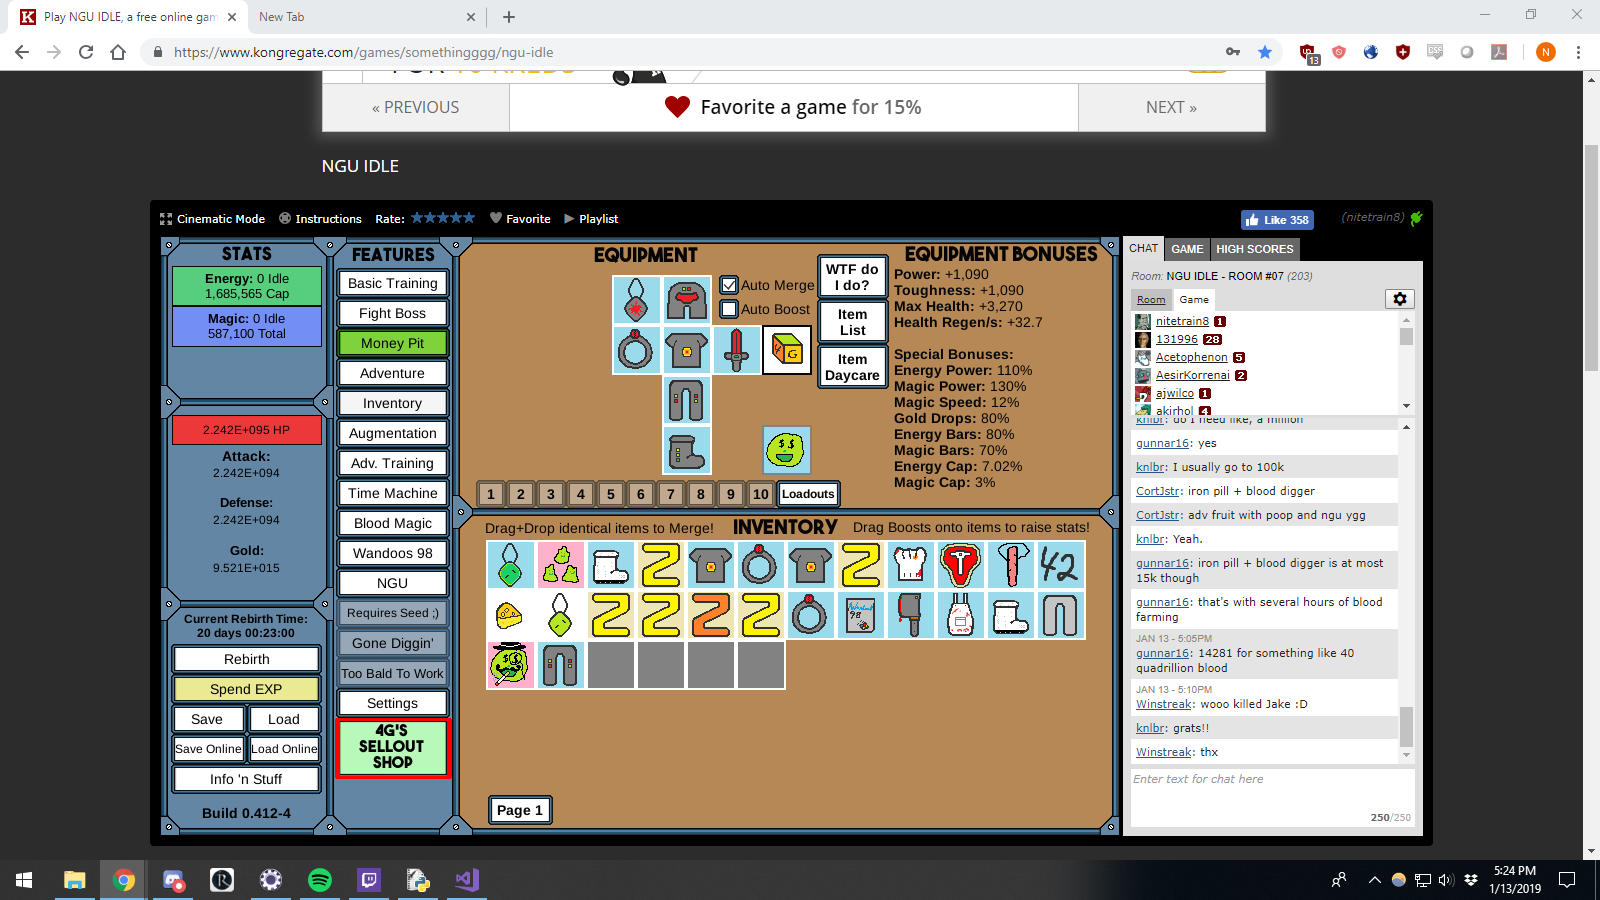

In [34]:
import time
tmpl = np.array(screenshot(sellout_shop))
t = time.time()
img_rgb = np.array(screenshot())
img_gray = cv2.cvtColor((img_rgb), cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(tmpl, cv2.COLOR_BGR2GRAY)
h, w = template.shape
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = .8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    print(pt)
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,0), 2)
#cv2.imshow("test", img_rgb)
print(time.time() - t)
PIL.Image.fromarray(img_rgb)

In [205]:
img2 = img_rgb[pt[1]:pt[1]+h, pt[0]:pt[0]+w]
img2[mask] = 0
PIL.Image.fromarray(img2)

In [150]:
#out = np.array(img_gray)
th = cv2.adaptiveThreshold(template, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 1)
PIL.Image.fromarray(th, "L")

c3db99c3993c9dc3
e7db99c3993c99c3
e7db99c3810291c3
c3db99c3993c9dc3


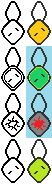

In [157]:
import imagehash
ys, xs = loc
imgs = []
aimg = Image.new('RGB', (w*2, h*len(xs)))
d = {}
ds = []
hashes = []
for i, (x, y) in enumerate(zip(xs, ys)):
    img = screenshot((x, y, x+w, y+h))
    img2 = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 1)
    img3 = PIL.Image.fromarray(img2, "L")
    aimg.paste(img3, (0, h*i))
    aimg.paste(img, (w, h*i))
    
    s = imagehash.average_hash(img3)
    ss = str(s)
    d[ss] = img2
    ds.append(ss)
    hashes.append(s)
    print(ss)
aimg

In [77]:
Image.new??

In [158]:
cmp = []
for a in hashes:
    for b in hashes:
        cmp.append(a==b)
for i, r in enumerate(cmp):
    if i and i%len(ds) == 0:
        print()
    print(str(r)[0], end="  ")

T  F  F  T  
F  T  F  F  
F  F  T  F  
T  F  F  T  

In [67]:
ds[0] == ds[4]

True

In [65]:
img

In [17]:
import imagehash

In [23]:
img = PIL.Image.fromarray(template)
h=imagehash.average_hash(img)

In [26]:
h

array([[ True,  True,  True, False, False,  True,  True,  True],
       [ True,  True, False, False, False,  True,  True,  True],
       [ True,  True, False, False, False,  True,  True,  True],
       [ True,  True, False, False, False,  True,  True,  True],
       [ True,  True, False, False, False, False,  True,  True],
       [ True,  True, False, False, False, False,  True,  True],
       [ True,  True,  True, False, False,  True,  True,  True],
       [ True, False, False, False, False, False, False,  True]])

In [4]:
attacks = [
    "regular",
    "strong",
    "parry",
    "piercing",
    "ult_attack",
    "block",
    "defensive",
    "heal",
    "offensive",
    "charge",
    "ult_buff"
]
find_bbox_coords(attacks)

('regular', (586, 329, 675, 348)),
('strong', (691, 330, 780, 347)),
('parry', (798, 330, 884, 348)),
('piercing', (901, 330, 990, 348)),
('ult_attack', (1007, 330, 1097, 348)),
('block', (481, 365, 570, 384)),
('defensive', (587, 367, 676, 385)),
('heal', (692, 367, 781, 384)),
('offensive', (796, 366, 884, 385)),
('charge', (902, 367, 988, 384)),
('ult_buff', (1007, 366, 1095, 385)),


In [5]:
adv_basic = [
    ('regular', (586, 329, 675, 348)),
    ('strong', (691, 330, 780, 347)),
    ('parry', (798, 330, 884, 348)),
    ('piercing', (901, 330, 990, 348)),
    ('ult_attack', (1007, 330, 1097, 348)),
    ('block', (481, 365, 570, 384)),
    ('defensive', (587, 367, 676, 385)),
    ('heal', (692, 367, 781, 384)),
    ('offensive', (796, 366, 884, 385)),
    ('charge', (902, 367, 988, 384)),
    ('ult_buff', (1007, 366, 1095, 385))
]

In [8]:
find_bbox_coords(["test"])

('test', (692, 332, 778, 346)),
